In [60]:
import pandas as pd
data = pd.read_csv("usa_house_stats.csv")
data.head()

,id,date,cost,bedrooms,bathrooms,square,square_lot,floors,view,condition,grade,square_above,square_basement,lat,long
0,3629160060,20150227T000000,720000.0,4,2.75,3370,7634,1.0,2,5,8,2110,1260,47.5259,-122.204
1,4058800830,20150318T000000,612000.0,6,3.00,3840,14040,1.5,3,3,8,2460,1380,47.5060,-122.241
2,2214800270,20140925T000000,355000.0,4,2.50,2770,7000,1.0,0,4,7,1940,830,47.3396,-122.256
3,1328330350,20150213T000000,390000.0,3,1.75,1320,7725,1.0,0,3,8,1320,0,47.4425,-122.133
4,8651580310,20140528T000000,621138.0,3,2.25,2180,7741,2.0,0,3,9,2180,0,47.6482,-122.072


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4654 non-null   int64  
 1   date             4654 non-null   object 
 2   cost             4654 non-null   float64
 3   bedrooms         4654 non-null   int64  
 4   bathrooms        4654 non-null   float64
 5   square           4654 non-null   int64  
 6   square_lot       4654 non-null   int64  
 7   floors           4654 non-null   float64
 8   view             4654 non-null   int64  
 9   condition        4654 non-null   int64  
 10  grade            4654 non-null   int64  
 11  square_above     4654 non-null   int64  
 12  square_basement  4654 non-null   int64  
 13  lat              4654 non-null   float64
 14  long             4654 non-null   float64
dtypes: float64(5), int64(9), object(1)
memory usage: 545.5+ KB


In [12]:
data.describe()

,id,cost,bedrooms,bathrooms,square,square_lot,floors,view,condition,grade,square_above,square_basement,lat,long
count,4.654000e+03,4.654000e+03,4654.000000,4654.000000,4654.000000,4.654000e+03,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000
mean,4.554878e+09,5.347083e+05,3.370004,2.082563,2060.906532,1.631941e+04,1.442845,0.249248,3.443060,7.597980,1761.503868,299.402664,47.560138,-122.216166
std,2.895396e+09,3.550061e+05,0.901899,0.759489,892.875408,5.042193e+04,0.515043,0.788493,0.664796,1.166443,815.499747,440.119380,0.141340,0.142013
min,1.200019e+06,8.400000e+04,0.000000,0.000000,384.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,384.000000,0.000000,47.155900,-122.509000
25%,2.025049e+09,3.199125e+05,3.000000,1.500000,1430.000000,5.360250e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,47.468350,-122.331000
50%,3.905085e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.738500e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,47.575150,-122.236000
75%,7.308001e+09,6.388750e+05,4.000000,2.500000,2520.000000,1.086150e+04,2.000000,0.000000,4.000000,8.000000,2160.000000,600.000000,47.679300,-122.127000
max,9.900000e+09,5.570000e+06,9.000000,6.000000,9200.000000,1.651359e+06,3.000000,4.000000,5.000000,13.000000,7880.000000,3000.000000,47.777500,-121.315000


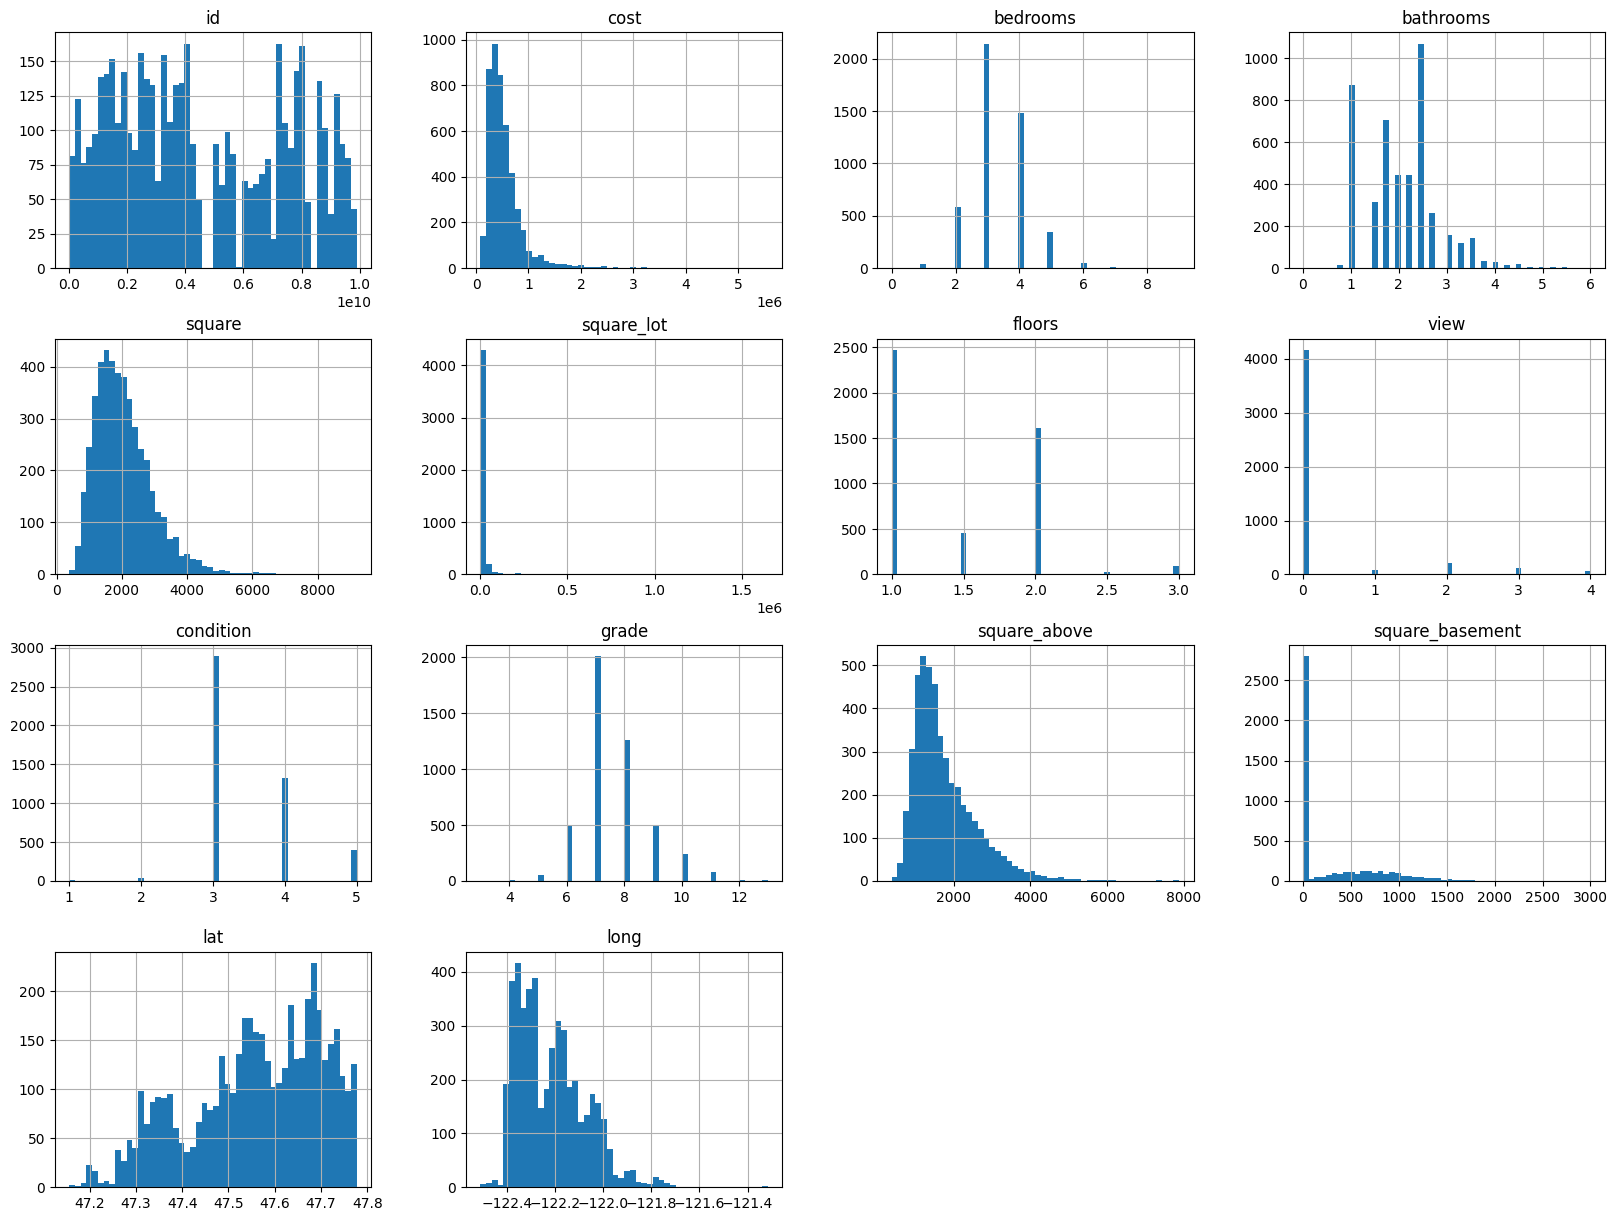

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20, 15))

plt.show()

<Axes: >

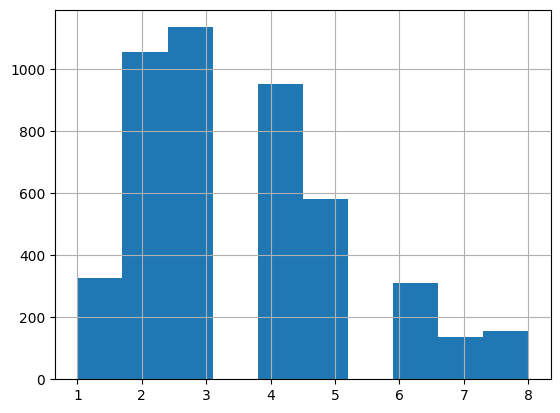

In [14]:
import numpy as np
data['square_cut'] = pd.cut(data['square'],
                              bins=[0., 1000., 1500, 2000, 2500, 3000, 3500, 4000, np.inf],
                              labels=[1, 2, 3, 4, 5, 6, 7, 8])

data['square_cut'].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['square_cut']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

strat_test_set['square_cut'].value_counts()/len(strat_test_set)

square_cut
3    0.243824
2    0.226638
4    0.205156
5    0.124597
1    0.070892
6    0.066595
8    0.033298
7    0.029001
Name: count, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("square_cut", axis=1, inplace=True)

In [17]:
len(strat_train_set)

3723

In [18]:
len(strat_test_set)

931

In [19]:
data = strat_train_set.copy()

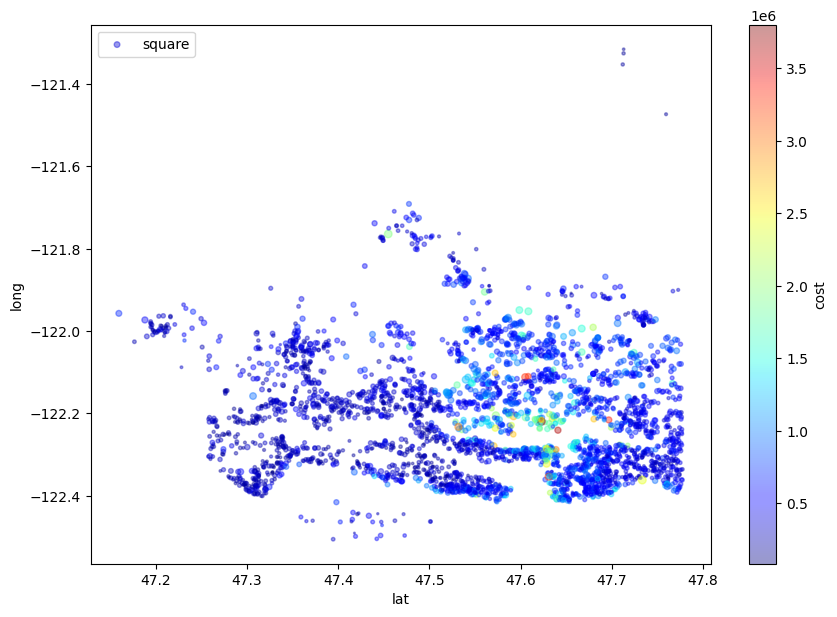

In [20]:
map = {1: 50, 2: 150, 3: 350, 4: 550}
data.plot(kind='scatter', x='lat', y='long', alpha=0.4,
             s=data['square']/250, label='square', figsize=(10, 7),
             c='cost', cmap=plt.get_cmap('jet'))
plt.legend()

In [21]:
numeric_columns = data.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
corr_matrix['cost'].sort_values(ascending=False)

cost               1.000000
square             0.685094
grade              0.664436
square_above       0.583924
bathrooms          0.509959
view               0.419018
lat                0.330537
square_basement    0.298555
bedrooms           0.292602
floors             0.268352
square_lot         0.077757
condition          0.050003
long               0.014886
id                -0.026302
Name: cost, dtype: float64

array([[<Axes: xlabel='cost', ylabel='cost'>,
        <Axes: xlabel='square', ylabel='cost'>,
        <Axes: xlabel='grade', ylabel='cost'>,
        <Axes: xlabel='square_above', ylabel='cost'>,
        <Axes: xlabel='bathrooms', ylabel='cost'>],
       [<Axes: xlabel='cost', ylabel='square'>,
        <Axes: xlabel='square', ylabel='square'>,
        <Axes: xlabel='grade', ylabel='square'>,
        <Axes: xlabel='square_above', ylabel='square'>,
        <Axes: xlabel='bathrooms', ylabel='square'>],
       [<Axes: xlabel='cost', ylabel='grade'>,
        <Axes: xlabel='square', ylabel='grade'>,
        <Axes: xlabel='grade', ylabel='grade'>,
        <Axes: xlabel='square_above', ylabel='grade'>,
        <Axes: xlabel='bathrooms', ylabel='grade'>],
       [<Axes: xlabel='cost', ylabel='square_above'>,
        <Axes: xlabel='square', ylabel='square_above'>,
        <Axes: xlabel='grade', ylabel='square_above'>,
        <Axes: xlabel='square_above', ylabel='square_above'>,
        <Axes: xl

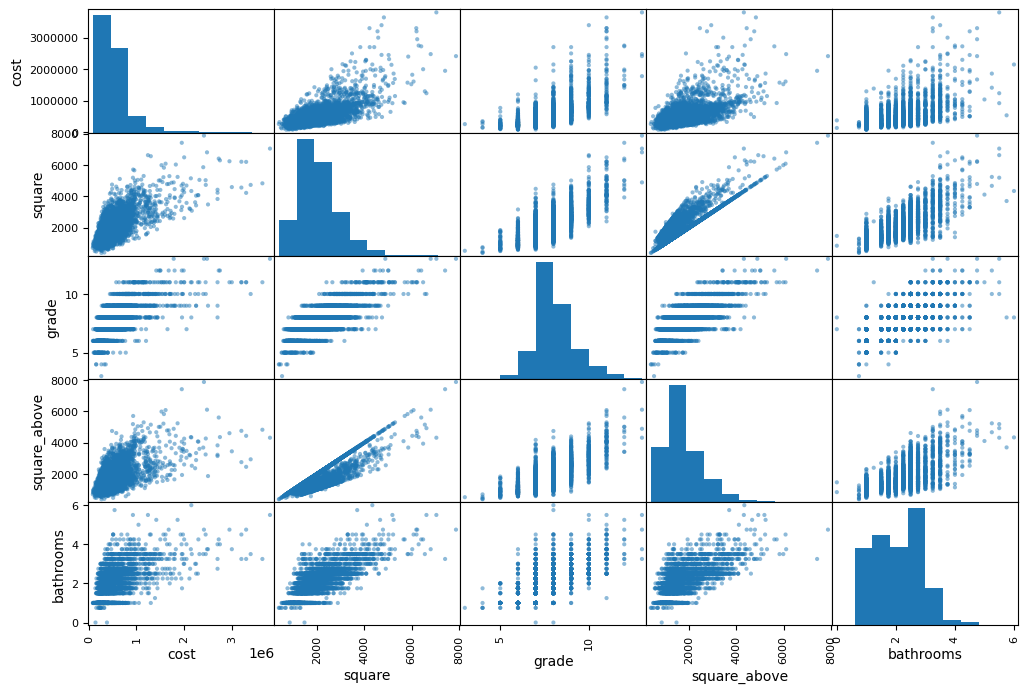

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["cost", "square", "grade", "square_above",
"bathrooms"]
scatter_matrix(data[attributes], figsize=(12, 8))

<Axes: xlabel='cost', ylabel='square'>

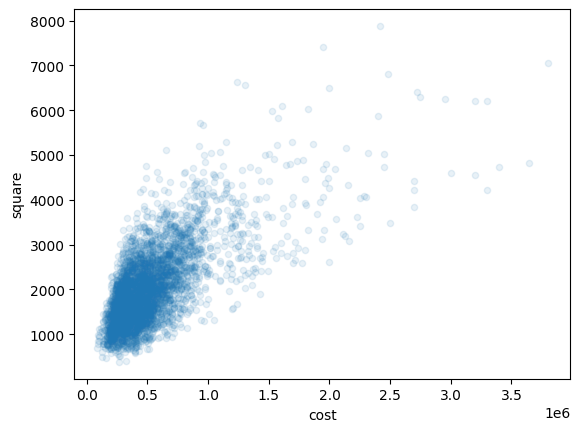

In [23]:
data.plot(kind="scatter", x="cost", y="square",
alpha=0.1)

In [26]:
data['bathrooms_per_floors'] = data['bathrooms']/data['floors']

numeric_columns = data.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
corr_matrix['cost'].sort_values(ascending=False)

cost                    1.000000
square                  0.685094
grade                   0.664436
square_above            0.583924
bathrooms               0.509959
view                    0.419018
lat                     0.330537
square_basement         0.298555
bedrooms                0.292602
floors                  0.268352
bathrooms_per_floors    0.231890
square_lot              0.077757
condition               0.050003
long                    0.014886
id                     -0.026302
Name: cost, dtype: float64

In [27]:
data = strat_train_set.drop('cost', axis=1)
data_labels = strat_train_set["cost"].copy()


In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
data_num = data.drop('date', axis=1)

imputer.fit(data_num)
imputer.statistics_

array([ 3.91840001e+09,  3.00000000e+00,  2.00000000e+00,  1.91000000e+03,
        7.74000000e+03,  1.00000000e+00,  0.00000000e+00,  3.00000000e+00,
        7.00000000e+00,  1.54000000e+03,  0.00000000e+00,  4.75750000e+01,
       -1.22235000e+02])

In [29]:
data_num.median().values

array([ 3.91840001e+09,  3.00000000e+00,  2.00000000e+00,  1.91000000e+03,
        7.74000000e+03,  1.00000000e+00,  0.00000000e+00,  3.00000000e+00,
        7.00000000e+00,  1.54000000e+03,  0.00000000e+00,  4.75750000e+01,
       -1.22235000e+02])

In [30]:
X = imputer.transform(data_num)

data_tr = pd.DataFrame(X, columns=data_num.columns,
index=data_num.index)

In [31]:
data_cat = data[['date']]
data_cat.head(10)

,date
2932,20141031T000000
2018,20140623T000000
1744,20140610T000000
2658,20140520T000000
4395,20150323T000000
376,20141028T000000
380,20150127T000000
3117,20150303T000000
4147,20140902T000000
1466,20150222T000000


In [32]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(data_cat)
housing_cat_encoded[:10]

array([[158.],
       [ 47.],
       [ 36.],
       [ 16.],
       [268.],
       [155.],
       [225.],
       [253.],
       [105.],
       [245.]])

In [33]:

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["date"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

# LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [37]:

some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [496780.53871105  72258.28397595 639469.08616619 282312.46403372
 434329.89658666]


In [38]:
print("Labels:", list(some_labels))

Labels: [370000.0, 249000.0, 563000.0, 219950.0, 443000.0]


In [39]:

from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

191278.42991977173

# DecisionTreeRegressor

In [40]:


from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, data_labels)

data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

In [41]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [187248.47113168 206534.42767067 197230.01697337 284948.17362482
 179241.76700772 192672.55865605 255968.57912611 190169.01068621
 207301.14486518 228611.33150114]
Mean: 212992.54812429467
Standard deviation: 32135.25013829434


In [42]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [211879.11811995 212715.3585671  188212.08722671 243366.72515619
 214282.05007881 188429.32611461 238391.45142458 208922.57285542
 210416.56076659 204990.13614788]
Mean: 212160.5386457842
Standard deviation: 16936.39283320077


# RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, data_labels)

data_predictions = forest_reg.predict(data_prepared)

forest_rmse = np.sqrt(mean_squared_error(data_labels, data_predictions))

forest_rmse

57127.5965249179

In [44]:
forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [140575.22386063 149381.95566676 139164.18947216 240196.13881314
 140421.72196771 131380.34125815 173158.49045725 148866.87928032
 142541.38549823 131078.28990604]
Mean: 153676.46161803845
Standard deviation: 30978.2176990491


# Fine-Tune The Model

## Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [47]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [48]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

244968.24514199232 {'max_features': 2, 'n_estimators': 3}
215046.506011138 {'max_features': 2, 'n_estimators': 10}
204560.79253689572 {'max_features': 2, 'n_estimators': 30}
241711.10684664597 {'max_features': 4, 'n_estimators': 3}
204884.58960471876 {'max_features': 4, 'n_estimators': 10}
192983.56154188953 {'max_features': 4, 'n_estimators': 30}
228931.223497249 {'max_features': 6, 'n_estimators': 3}
203665.8866626247 {'max_features': 6, 'n_estimators': 10}
191531.99221585252 {'max_features': 6, 'n_estimators': 30}
239743.84456858173 {'max_features': 8, 'n_estimators': 3}
197605.09342826993 {'max_features': 8, 'n_estimators': 10}
192840.2943568484 {'max_features': 8, 'n_estimators': 30}
242277.72334533173 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
209706.81257106643 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
244549.64916998392 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
207914.30489815012 {'bootstrap': False, 'max_features': 3, 'n_estim

In [58]:

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "max_depth": [3, 5, 10, None],
    "n_estimators": [30, 100, 200, 300, 400, 500],
    "max_features": [np.random.randint(1, 30) for _ in range(30)],
    "bootstrap": [True, False],
    "min_samples_leaf": [np.random.randint(1, 40) for _ in range(40)]
}

forest_reg = RandomForestRegressor()

random_search = RandomizedSearchCV(
    forest_reg,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

random_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [18, 7, 10, 4, 26, 9,
                                                         10, 4, 28, 20, 15, 1,
                                                         13, 24, 2, 1, 27, 5,
                                                         20, 15, 12, 23, 21, 9,
                                                         23, 11, 29, 16, 29,
                                                         16],
                                        'min_samples_leaf': [20, 22, 28, 30, 9,
                                                             7, 18, 16, 5, 10,
                                                             4, 11, 13, 16, 19,
                                                             33, 13, 4, 32, 18,
                                                             17, 10, 26, 8, 27,
                                                             34, 3, 22, 39, 20, ...],
                                        'n_estimators': [30, 100, 200, 300, 400,
                                                         500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [50]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 3,
 'max_features': 26,
 'max_depth': None,
 'bootstrap': False}

In [51]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=26, min_samples_leaf=3)

In [52]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

273641.20682278456 {'n_estimators': 400, 'min_samples_leaf': 22, 'max_features': 26, 'max_depth': None, 'bootstrap': False}
334922.5308475307 {'n_estimators': 300, 'min_samples_leaf': 23, 'max_features': 7, 'max_depth': 10, 'bootstrap': True}
304608.0350483575 {'n_estimators': 200, 'min_samples_leaf': 18, 'max_features': 19, 'max_depth': 3, 'bootstrap': True}
283894.0238628802 {'n_estimators': 400, 'min_samples_leaf': 34, 'max_features': 26, 'max_depth': 5, 'bootstrap': False}
198882.81275287154 {'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': 26, 'max_depth': None, 'bootstrap': False}
319216.98361144395 {'n_estimators': 200, 'min_samples_leaf': 37, 'max_features': 13, 'max_depth': 10, 'bootstrap': False}
283619.35020709684 {'n_estimators': 400, 'min_samples_leaf': 17, 'max_features': 25, 'max_depth': 5, 'bootstrap': True}
313142.1969460309 {'n_estimators': 400, 'min_samples_leaf': 23, 'max_features': 15, 'max_depth': None, 'bootstrap': False}
326463.5509388364 {'n_estimato

In [53]:
feature_importances = random_search.best_estimator_.feature_importances_
feature_importances

array([1.16476986e-02, 2.36493286e-02, 1.19140259e-01, 1.95692500e-01,
       2.76907855e-02, 3.21877333e-02, 7.78737711e-02, 1.01195836e-02,
       1.50305075e-01, 1.13973454e-01, 5.33823534e-02, 1.37523773e-01,
       3.12909114e-02, 8.53369146e-05, 0.00000000e+00, 0.00000000e+00,
       2.38110750e-05, 6.93110834e-06, 9.21081506e-05, 3.47176069e-06,
       0.00000000e+00, 0.00000000e+00, 8.61980536e-05, 3.49292210e-05,
       1.19957720e-05, 1.81869873e-05, 5.63038742e-06, 0.00000000e+00,
       7.95495300e-05, 9.56547287e-05, 7.34775411e-05, 4.61879660e-06,
       1.05184954e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.05303427e-06, 1.29714146e-04, 8.62030937e-05, 3.24478268e-05,
       0.00000000e+00, 0.00000000e+00, 4.20238898e-05, 2.69400786e-05,
       2.11658580e-05, 2.24812623e-05, 3.74784336e-05, 0.00000000e+00,
       1.68643804e-06, 5.47022067e-05, 1.11288888e-05, 4.75150355e-05,
       1.40998343e-06, 1.41460722e-05, 5.22476661e-05, 3.21945197e-06,
      

In [54]:
extra_attribs = ["bathrooms_per_floors"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1956925003191001, 'square'),
 (0.1503050746898424, 'grade'),
 (0.13752377283339157, 'lat'),
 (0.11914025854988046, 'bathrooms'),
 (0.11397345366907348, 'square_above'),
 (0.07787377110713897, 'view'),
 (0.053382353419822275, 'square_basement'),
 (0.032187733288950075, 'floors'),
 (0.03129091136083269, 'long'),
 (0.027690785457528524, 'square_lot'),
 (0.023649328592481395, 'bedrooms'),
 (0.011647698630332302, 'id'),
 (0.01011958360343777, 'condition'),
 (0.001271320084991347, '20141229T000000'),
 (0.0007069568014688255, '20150109T000000'),
 (0.0006884626652862426, '20140910T000000'),
 (0.0005915308543545216, '20150323T000000'),
 (0.0005806212756807541, '20150303T000000'),
 (0.0004354490692696171, '20140730T000000'),
 (0.00040303402592286756, '20150312T000000'),
 (0.0003664591392813509, '20141202T000000'),
 (0.00033143171584456394, '20140930T000000'),
 (0.00031506714468082096, '20150302T000000'),
 (0.0002955560475546454, '20150108T000000'),
 (0.00028304075682475697, '20150203T000000'

# Evaluate Your System on the Test Set

In [56]:
final_model = random_search.best_estimator_
X_test = strat_test_set.drop("cost", axis=1)
y_test = strat_test_set["cost"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([145899.09015557, 293576.22251671])